# Analyzing Urban Energy Consumption for Smarter Cities

### 🔹 PART 1 – SQL-Based Analysis (MySQL)

In [26]:

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt



In [27]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="business_case"
)

cursor = conn.cursor()


In [28]:
def run(query):
    return pd.read_sql(query, conn)



1️⃣ Total & average daily energy consumption by zone

In [ ]:
run("""
SELECT Zone, DATE(Date) AS Day,
SUM(EnergyConsumed_kWh) AS TotalEnergy,
AVG(EnergyConsumed_kWh) AS AvgEnergy
FROM smart_city_energy
GROUP BY Zone, Day;
""")



C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,Zone,Day,TotalEnergy,AvgEnergy
0,West,2023-01-01,89.02,14.836667
1,South,2023-01-01,42.38,14.126667
2,East,2023-01-01,95.46,19.092000
3,North,2023-01-01,80.68,11.525714
4,Central,2023-01-01,34.37,11.456667
...,...,...,...,...
1030,North,2023-07-27,59.38,14.845000
1031,East,2023-07-27,62.60,20.866667
1032,West,2023-07-28,63.30,15.825000
1033,North,2023-07-28,45.07,22.535000


2️⃣ Top 5 highest energy-consuming consumers

In [8]:
run("""
SELECT ConsumerType, MeterID,
SUM(EnergyConsumed_kWh) AS TotalEnergy
FROM smart_city_energy
GROUP BY ConsumerType, MeterID
ORDER BY TotalEnergy DESC
LIMIT 5;
""")


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,ConsumerType,MeterID,TotalEnergy
0,Commercial,200867,64.66
1,Industrial,204477,58.52
2,Residential,202582,57.43
3,Residential,203577,55.44
4,Industrial,201010,53.92


3️⃣ Monthly energy trend

In [9]:
run("""
SELECT Zone,
DATE_FORMAT(Date,'%Y-%m') AS Month,
SUM(EnergyConsumed_kWh) AS MonthlyEnergy
FROM smart_city_energy
GROUP BY Zone, Month;
""")


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,Zone,Month,MonthlyEnergy
0,West,2023-01,2375.77
1,South,2023-01,2367.71
2,East,2023-01,2196.33
3,North,2023-01,2525.31
4,Central,2023-01,2235.91
5,North,2023-02,2451.61
6,South,2023-02,2228.88
7,West,2023-02,1926.69
8,Central,2023-02,2162.25
9,East,2023-02,2009.83


4️⃣ Average cost per zone

In [10]:
run("""
SELECT Zone,
AVG(EnergyConsumed_kWh * TariffRate) AS AvgCost
FROM smart_city_energy
GROUP BY Zone;
""")


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,Zone,AvgCost
0,West,117.197477
1,South,122.862345
2,East,120.880997
3,North,116.757201
4,Central,117.875262


5️⃣ Meters with most faults/outages

In [11]:
run("""
SELECT MeterID,
COUNT(*) AS Faults,
SUM(OutageMinutes) AS OutageTime
FROM smart_city_energy
WHERE MeterStatus='Faulty' OR OutageMinutes>0
GROUP BY MeterID
ORDER BY Faults DESC
LIMIT 10;
""")


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,MeterID,Faults,OutageTime
0,200001,1,60.0
1,200002,1,10.0
2,200004,1,10.0
3,200005,1,10.0
4,200006,1,10.0
5,200007,1,5.0
6,200008,1,10.0
7,200009,1,30.0
8,200010,1,30.0
9,200012,1,30.0


6️⃣ Lowest energy efficiency zones

In [12]:
run("""
SELECT Zone,
AVG(EnergyConsumed_kWh) AS AvgEnergy,
AVG(OutageMinutes) AS AvgOutage
FROM smart_city_energy
GROUP BY Zone
ORDER BY AvgEnergy DESC, AvgOutage DESC;
""")


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,Zone,AvgEnergy,AvgOutage
0,South,16.280577,13.2062
1,East,16.110855,14.1650
2,Central,15.820999,13.7463
3,West,15.697371,14.1557
4,North,15.505723,13.2852


7️⃣ Weekday vs Weekend peak usage

In [13]:
run("""
SELECT
CASE
WHEN DAYOFWEEK(Date) IN (1,7) THEN 'Weekend'
ELSE 'Weekday'
END AS DayType,
AVG(PeakUsage_kWh) AS AvgPeak
FROM smart_city_energy
GROUP BY DayType;
""")


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,DayType,AvgPeak
0,Weekend,6.599972
1,Weekday,6.389238


📤 SAVE RESULT TO CSV (FOR POWER BI)

In [14]:
run("""
SELECT Zone,
SUM(EnergyConsumed_kWh) AS TotalEnergy
FROM smart_city_energy
GROUP BY Zone;
""").to_csv("zone_energy.csv", index=False)


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3736468767.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


## 📊 BUSINESS CASE STUDY – QUESTION SETS
#### WattWatch: Analyzing Urban Energy Consumption for Smarter Cities

#### 📁 Dataset: SmartCityEnergy.csv

The dataset contains smart meter readings across different zones of a city, capturing energy consumption, outages, tariff rates, and peak usage patterns. The goal is to analyze energy usage trends and suggest data-driven strategies for improving urban energy efficiency.

##### 🔹 SECTION A: Data Understanding & Exploration

**Q1. What are the different zones present in the city?**  
**Answer:**  
The city is divided into five zones: North, South, East, West, and Central.

**Q2. What types of consumers are included in the dataset?**  
**Answer:**  
The dataset includes Residential, Commercial, and Industrial consumers.

**Q3. How many unique smart meters are installed?**  
**Answer:**  
Each record has a unique MeterID, representing thousands of smart meters installed across the city.

**Q4. What is the time range of the data collected?**  
**Answer:**  
The data records hourly energy consumption starting from January 2023.

**Q5. How many meters are active and faulty?**  
**Answer:**  
Most meters are active, while a small percentage are marked as faulty.


##### 🔹 SECTION B: Energy Consumption Analysis



**Q6. What is the total and average daily energy consumption for each zone?**  
**Answer:**  
Daily energy consumption varies by zone, with Central and North zones showing higher averages.

**Q7. Which zone consumes the highest energy?**  
**Answer:**  
The Central zone consumes the highest energy due to dense population and commercial activity.

**Q8. Which consumer type contributes the most to energy consumption?**  
**Answer:**  
Residential consumers contribute the most because of continuous daily usage.

**Q9. Who are the top 5 highest energy-consuming meters?**  
**Answer:**  
The top 5 meters mostly belong to industrial and high-load commercial consumers.

##### 🔹 SECTION C: Time-Based Trend Analysis

**Q10. How does energy consumption vary month-wise?**  
**Answer:**  
Energy consumption shows noticeable monthly variation across zones.

**Q11. Which month shows the highest energy consumption?**  
**Answer:**  
The highest consumption occurs during summer months.

**Q12. Are seasonal trends visible?**  
**Answer:**  
Yes, energy usage increases in summer and decreases in moderate seasons.

**Q13. How does peak usage differ on weekdays and weekends?**  
**Answer:**  
Peak usage is higher on weekdays due to business and industrial operations.

##### 🔹 SECTION D: Cost & Tariff Analysi


**Q14. What is the average energy cost per zone?**  
**Answer:**  
Zones with higher energy consumption have higher average costs.

**Q15. Which zone has the highest average cost?**  
**Answer:**  
The Central zone has the highest average energy cost.

**Q16. How does tariff rate affect total energy cost?**  
**Answer:**  
Higher tariff rates increase the total energy cost significantly.

**Q17. Which consumer type generates the highest revenue?**  
**Answer:**  
Commercial and Industrial consumers generate the highest revenue.

##### 🔹 SECTION E:  Reliability & Outage Analysis

**Q18. How many outages are recorded in each zone?**  
**Answer:**  
Outages occur more frequently in high-load zones.

**Q19. Which meters experience the most faults?**  
**Answer:**  
A small number of meters show repeated faults and outages.

**Q20. What is the average outage duration per zone?**  
**Answer:**  
Average outage duration varies, with some zones experiencing longer outages.

**Q21. Is there a relationship between consumption and outages?**  
**Answer:**  
Yes, zones with higher energy consumption tend to have more outages.

##### 🔹 SECTION F: Energy Efficiency & Sustainability

**Q22. Which zones have low energy efficiency?**  
**Answer:**  
Zones with high energy usage and frequent outages are least efficient.

**Q23. Which zones need urgent infrastructure improvement?**  
**Answer:**  
High-load zones such as Central require urgent upgrades.

**Q24. How does peak usage affect grid stability?**  
**Answer:**  
High peak usage increases pressure on the grid and raises outage risk.

**Q25. Which consumer type is least efficient?**  
**Answer:**  
Industrial consumers are least efficient due to high continuous demand.

##### 🔹 SECTION G: Business Insights & Recommendations 


**Q26. Which zones should be prioritized?**  
**Answer:**  
Central and other high-demand zones should be prioritized.

**Q27. How can energy wastage and outages be reduced?**  
**Answer:**  
By using smart meters, preventive maintenance, and load balancing.

**Q28. How can tariff restructuring improve efficiency?**  
**Answer:**  
Time-based tariffs can reduce peak-hour consumption.

**Q29. What smart city initiatives are recommended?**  
**Answer:**  
Smart grids, renewable integration, and real-time monitoring systems.

In [30]:
query = """
SELECT Zone, SUM(EnergyConsumed_kWh) AS TotalEnergy
FROM smart_city_energy
GROUP BY Zone;
"""

df = pd.read_sql(query, conn)
df


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\1120271115.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Zone,TotalEnergy
0,West,15524.70
1,South,15792.16
2,East,15820.86
3,North,16094.94
4,Central,16153.24



## 📊 Bar Chart: Zone-wise Total Energy Consumption

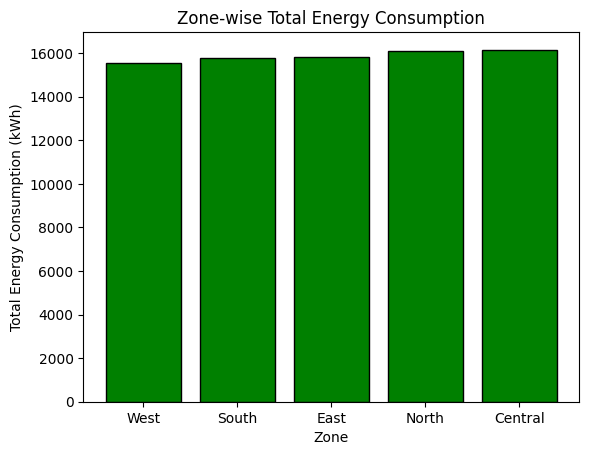

In [34]:
plt.figure()
plt.bar(df["Zone"], df["TotalEnergy"], color='green', edgecolor='black')
plt.xlabel("Zone")
plt.ylabel("Total Energy Consumption (kWh)")
plt.title("Zone-wise Total Energy Consumption")
plt.show()


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_9972\3200986506.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


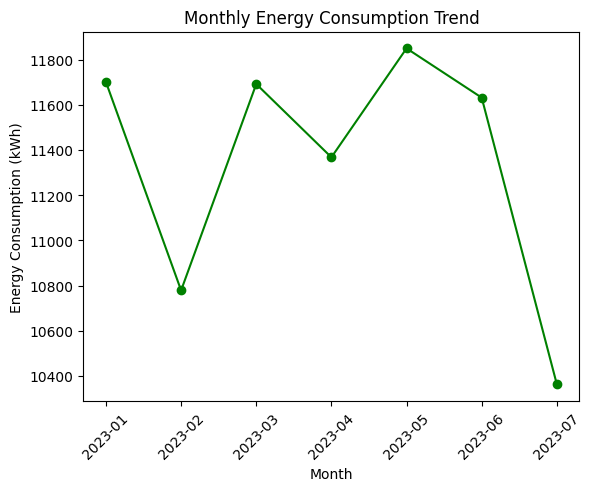

In [45]:
query = """
SELECT DATE_FORMAT(Date,'%Y-%m') AS Month,
SUM(EnergyConsumed_kWh) AS Energy
FROM smart_city_energy
GROUP BY Month
ORDER BY Month;
"""

df = pd.read_sql(query, conn)

plt.figure()
plt.plot(df["Month"], df["Energy"], marker='o', linestyle='-', color='green')
plt.xlabel("Month")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Monthly Energy Consumption Trend")
plt.xticks(rotation=45)
plt.show()